<a href="https://colab.research.google.com/github/danielmnunes/Introducao-a-Computacao/blob/main/Exercicios%20de%20R/ExerciciosDeR_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="150px" src="https://blog-static.infra.grancursosonline.com.br/wp-content/uploads/2015/09/03174643/UFC2.png" align="right" hspace="30px" vspace="0px"></p>  

<h1>
<strong> Universidade Federal do Ceará </strong>  <br>
Bacheralado em Matemática Industrial  <br>
Exercícios de R - Lista 1 <br>
Disciplina: Introdução à Computação  <br>
Professor: Ronald Targino <br>
Aluno: Daniel Magalhães Nunes
</h1>

In [190]:
rm(list=ls())

item A

In [191]:
valor = sample(seq(from = 500, to = 4000, by=100), 100, replace = TRUE)
produto = sample( c("tv", "notebook", "impressora", "smartphone"), prob = c(0.3, 0.2, 0.1, 0.4), size = 100, replace = TRUE)
quantidade = sample(10:4000, 100)
mes = sample(1:12, 100, replace = TRUE)
margem = runif(min = 0.01, max = 0.35, n=100)
ano = sample(c(2017, 2018, 2019), prob = c(0.5, 0.2, 0.3), 100,replace = TRUE)
ls()

[1] "ano"        "margem"     "mes"        "produto"    "quantidade"
[6] "valor"

item B

In [192]:
vendas =  data.frame(ano, mes, produto,quantidade, valor, margem)
rm(ano, margem, mes, produto, quantidade, valor)
ls()

[1] "vendas"

item C/D

In [193]:
vendas$lucro = vendas$quantidade *  vendas$valor * vendas$margem

In [194]:
install.packages("tidyverse");
install.packages("dplyr");

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [195]:
library(dplyr);
library(tibble);

item E

In [196]:
vendas %>% group_by(ano) %>% summarise( min(lucro) , mean(lucro), median(lucro), max(lucro), sd(lucro))

ano,min(lucro),mean(lucro),median(lucro),max(lucro),sd(lucro)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017,30011.305,635814.5,324018.5,3409801,810121.5
2018,4221.785,652868.3,412648.9,1747474,602639.1
2019,29611.780,799844.3,594264.9,2567858,681892.5


item F

In [197]:
stats_lucro = vendas %>% group_by(ano) %>% summarise( min(lucro) , mean(lucro), median(lucro), max(lucro), sd(lucro))

In [198]:
lucro2017 = vendas %>% filter(ano == 2017)
lucro2018 = vendas %>% filter(ano == 2018)
lucro2019 = vendas %>% filter(ano == 2019)

item G

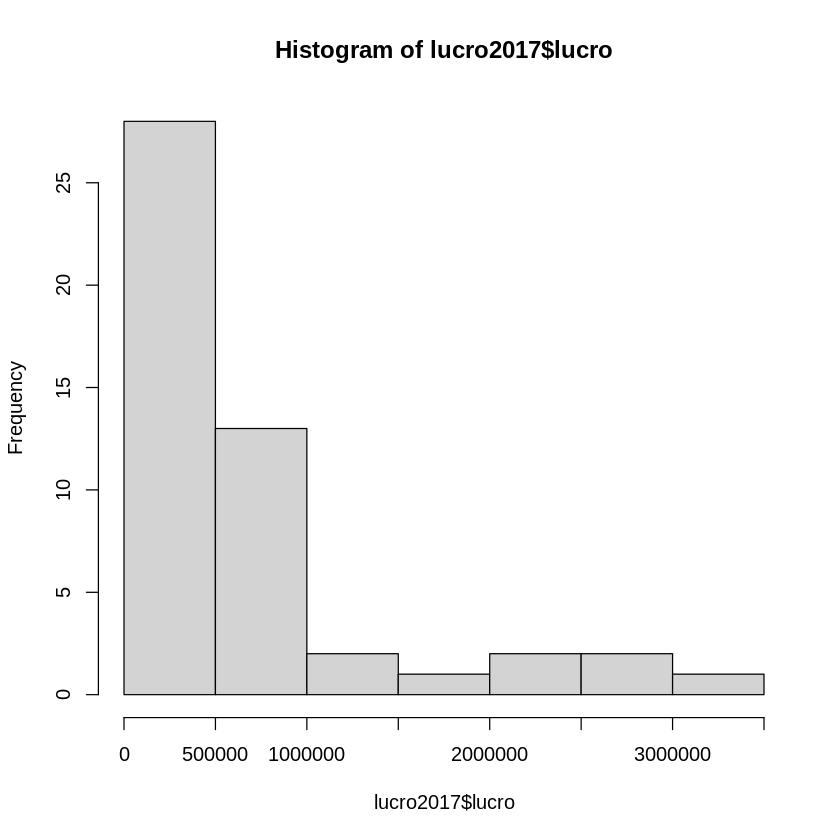

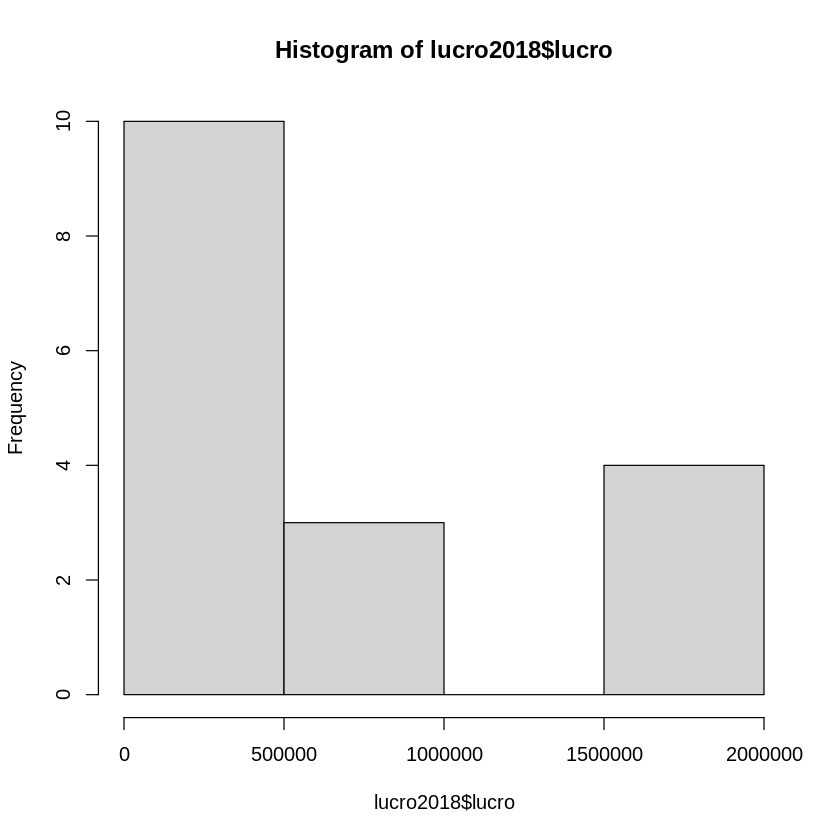

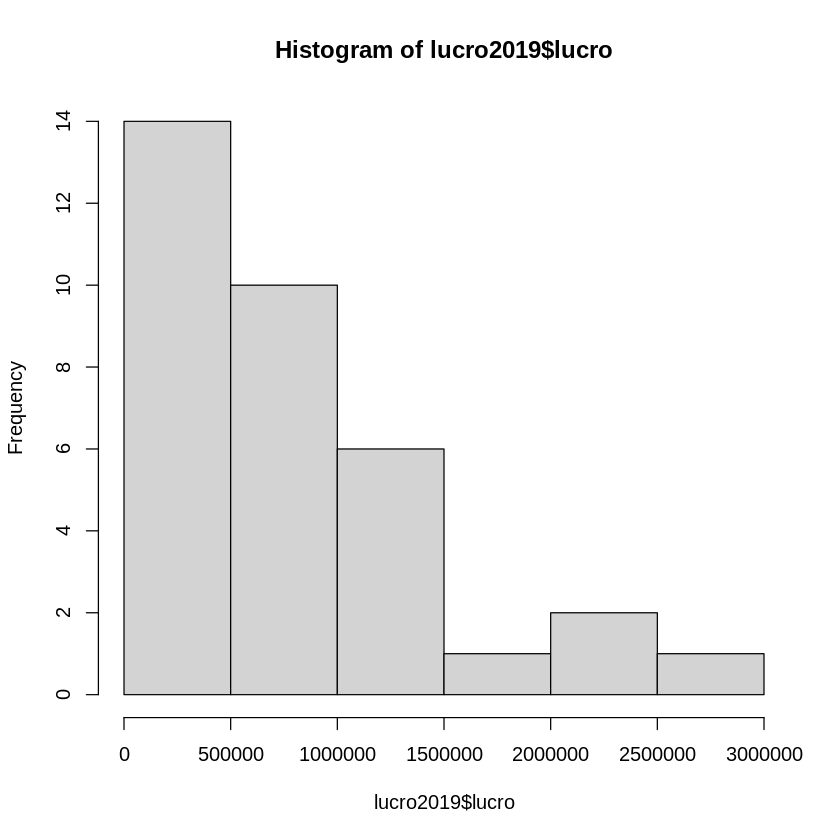

In [199]:
hist(lucro2017$lucro)
hist(lucro2018$lucro)
hist(lucro2019$lucro)

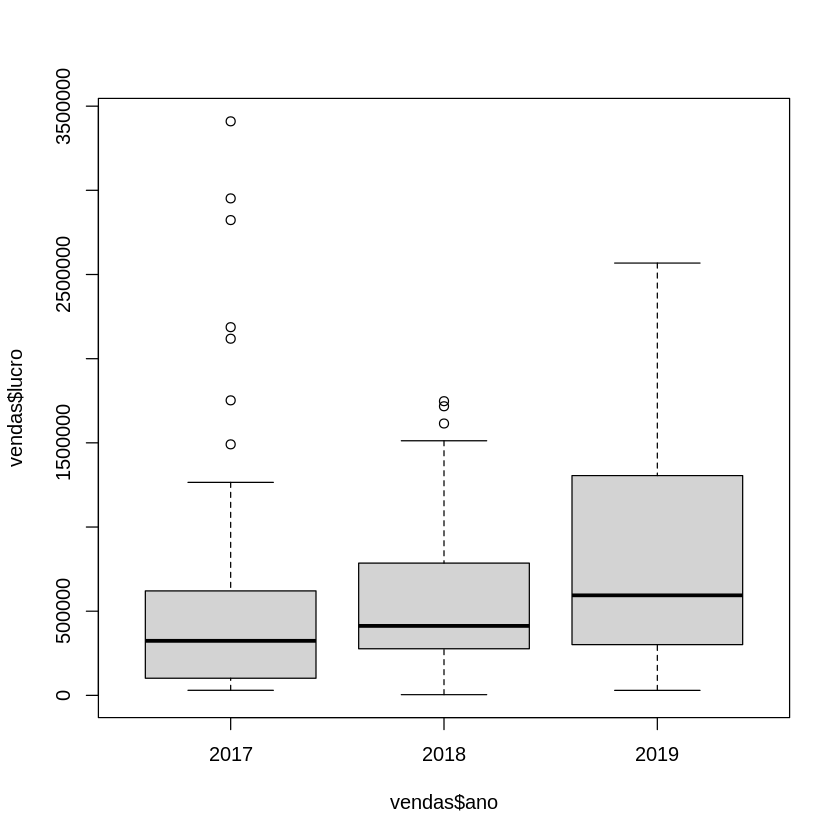

In [200]:
boxplot(vendas$lucro ~ vendas$ano)

item H

In [201]:
tabela = table(vendas$produto)
prop.table(tabela)
margin.table(tabela, 1)


impressora   notebook smartphone         tv 
      0.15       0.19       0.38       0.28 


impressora   notebook smartphone         tv 
        15         19         38         28 

item I

In [202]:
xtabs(~ano+produto,data=vendas)

      produto
ano    impressora notebook smartphone tv
  2017         10       11         13 15
  2018          2        4          7  4
  2019          3        4         18  9

item J

In [203]:
tapply(vendas$lucro,list(vendas$ano, vendas$mes),mean, default=0)

,1,2,3,4,5,6,7,8,9,10,11,12
2017,789424.3,324018.5,1154157.2,655061.7,66521.150,678115.2,248666.51,409848.4,384071.9,566477.2,599674.5,178688.37
2018,0.0,380590.9,0.0,378114.1,4221.785,209978.0,1717348.43,1512379.8,510877.3,1747474.3,399459.8,971666.52
2019,1280182.0,1791298.8,505808.1,353293.4,1373493.035,522742.8,36064.35,346850.0,1706484.0,518526.2,778756.2,46108.26


item K

In [204]:
tapply(vendas$lucro,vendas$ano, summary , default=0)

$`2017`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30011  101706  324018  635814  620692 3409801 

$`2018`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4222  276847  412649  652868  785589 1747474 

$`2019`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29612  308654  594265  799844 1288526 2567858 


item L

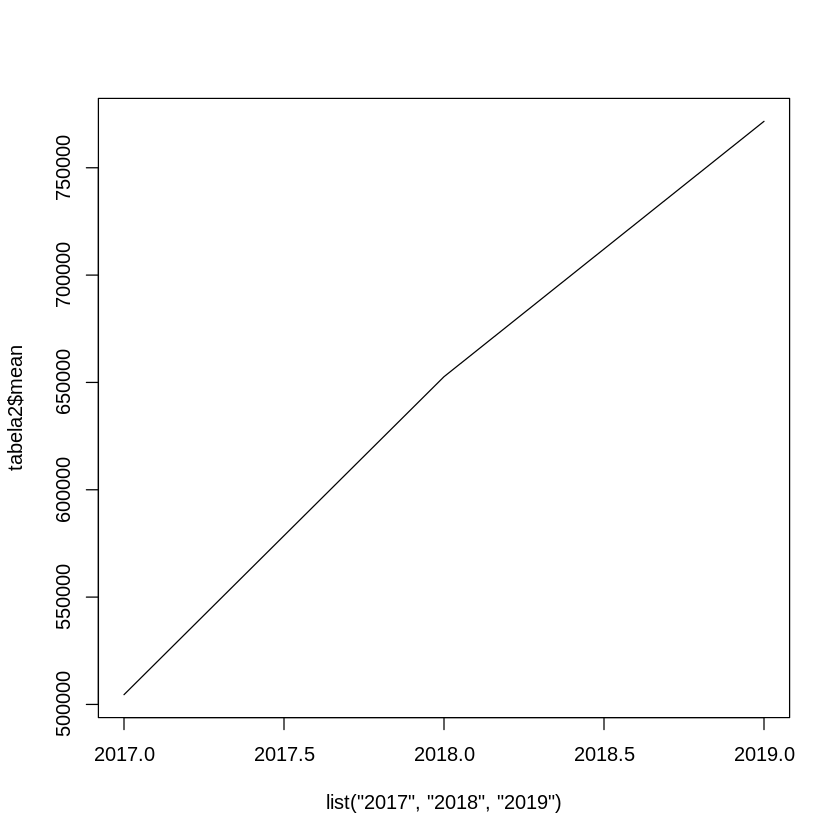

In [205]:
tabela2 = data.frame(tapply(vendas$lucro,list(vendas$ano, vendas$mes),mean, default=0))
tabela2$mean <- rowMeans(tabela2[,1:12])
plot( y=tabela2$mean , x=list("2017", "2018", "2019"), type = "l")

item M

In [206]:
vendas$valor_total = vendas$quantidade * vendas$valor
tapply(vendas$valor_total,list(vendas$produto, vendas$ano), sum, default=0)

,2017,2018,2019
impressora,42424900,5925000,13482400
notebook,31662400,17075200,6952600
smartphone,54450500,20343900,81077000
tv,35605700,14795300,49055700


In [207]:
vendas <- subset (vendas, select = -valor_total)

Item N

In [208]:
subset(vendas, margem >= 0.33)

,ano,mes,produto,quantidade,valor,margem,lucro
,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
4,2017,11,smartphone,3179,800,0.3490200,887627.6
12,2019,3,smartphone,1985,1300,0.3496031,902150.7
15,2019,6,notebook,380,2500,0.3473030,329937.8
19,2018,12,tv,3691,1300,0.3365701,1614964.5
23,2017,3,tv,2438,2700,0.3322543,2187097.4
64,2017,6,smartphone,3542,2900,0.3319575,3409800.7
71,2017,9,smartphone,844,2000,0.3380110,570562.6
84,2018,9,smartphone,2186,700,0.3338631,510877.3
98,2019,3,tv,1123,3200,0.3443913,1237604.4


item O

In [209]:
MaioresMargens = subset(vendas, margem >= 0.34, select = c(ano, mes, produto, margem))

item P

In [210]:
MenoresMargens = subset(vendas, margem <= 0.02, select = c(ano, mes, produto, margem))

item Q

In [211]:
MargensExtremas = cbind(MaioresMargens, MenoresMargens)

In [212]:
vendas <- tibble::rowid_to_column(vendas, "id")

In [213]:
subset(vendas, margem >= 0.32, select = c(id, produto))

,id,produto
,<int>,<chr>
4,4,smartphone
12,12,smartphone
15,15,notebook
19,19,tv
23,23,tv
41,41,impressora
64,64,smartphone
71,71,smartphone
81,81,smartphone


In [214]:
subset(vendas, margem >= 0.32, select = c(id))

,id
,<int>
4,4
12,12
15,15
19,19
23,23
41,41
64,64
71,71
81,81


In [215]:
dim(subset(vendas, margem >= 0.2 & produto=="impressora", select = c(id, produto, margem)))[1]

[1] 4

In [216]:
write.csv(vendas,"VendasAtualizado.csv", row.names = FALSE)

In [217]:
# vendasaleatorias20 = 
vendas[sample(1:100, 20), c(2,3,4,8)]

,ano,mes,produto,lucro
,<dbl>,<int>,<chr>,<dbl>
52,2018,11,tv,334613.005
75,2019,5,tv,1359355.671
97,2018,5,smartphone,4221.785
21,2017,1,smartphone,205295.237
88,2019,11,notebook,347111.311
3,2019,6,tv,786365.992
9,2019,4,smartphone,335337.541
18,2017,5,impressora,90539.186
95,2017,1,tv,743068.572


{N+1, 2020, 1, tv, 50, 2000, 15} e {N+2,
2020, 1, notebook, 350, 2700, 20}

In [218]:
l1 = c(101, "2020", 1, "tv", 50, 2000, 0.15, 50 * 2000 * 15)
l2 = c(102, "2020", 1, "notebook", 350, 2700, 0.20, 350 * 2700 * 20)

In [219]:
vendas = rbind(vendas, l1, l2)

In [224]:
vendas = vendas %>% mutate(produto=recode(produto, `tv`="TV"))

id,ano,mes,produto,quantidade,valor,margem,lucro
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2019,2,smartphone,2478,3500,0.241698874258436,2096254.33644342
2,2017,3,smartphone,2391,2800,0.316461018067785,2118643.2237602
3,2019,6,TV,1190,3800,0.173897831123322,786365.992339663
4,2017,11,smartphone,3179,800,0.349019987145439,887627.63130828
5,2018,2,notebook,187,3800,0.259210946909152,184195.298873643
6,2017,1,TV,667,3000,0.301318884026259,602939.086936545
7,2017,7,TV,798,2500,0.0357265933044255,71274.5536423288
8,2019,4,smartphone,765,2800,0.140783825195394,301558.953568535
9,2019,4,smartphone,2364,1900,0.0746588167874142,335337.54148235


In [226]:
write.csv(vendas,"VendasAtualizado2.csv", row.names = FALSE)